# Embedding layers with keras


Well use the imdb dataset to learn word embeddings as we train our dataset. This dataset contains 25,000 movie reviews from IMDB, labeled with sentiment (positive or negative). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. We will only use the first 20 words from each review to speed up training, use a max vocab size of 10,000.

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
vocab_size = 10000 #vocab size
maxlen = 20  #number of word used from each review
#load dataset as a list of ints
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
#make all sequences of the same length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

C:\Users\edwin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print(imdb)

<module 'keras.datasets.imdb' from 'C:\\Users\\edwin\\Anaconda3\\lib\\site-packages\\keras\\datasets\\imdb.py'>


In [3]:
x_train.shape #number of review, number of words in each review

(25000, 20)

In [4]:
x_train

array([[  65,   16,   38, ...,   19,  178,   32],
       [  23,    4, 1690, ...,   16,  145,   95],
       [1352,   13,  191, ...,    7,  129,  113],
       ...,
       [  11, 1818, 7561, ...,    4, 3586,    2],
       [  92,  401,  728, ...,   12,    9,   23],
       [ 764,   40,    4, ...,  204,  131,    9]])

In [5]:
x_test.shape

(25000, 20)

In [6]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

We can think of the Embedding layer as a dicionary that maps a index assigned to a word to a word vector. This layer is very flexiable and can be used in a few ways:

* The embedding layer can be used at the start of a larger deep learning model. 
* Also we could load pre-train word embeddings into the embedding layer when we create our model.
* Use the embedding layer to train our own word2vec models.

The keras embedding layer doesn't require us to onehot encode our words, instead we have to give each word a unqiue intger number as an id. For the imdb dataset we've loaded this has already been done, but if this wasn't the case we could use sklearn [LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [7]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [8]:
x_train.shape #number of examples, number or words

(25000, 20)

In [9]:
x_train[1] # words are representedby numbers

array([  23,    4, 1690,   15,   16,    4, 1355,    5,   28,    6,   52,
        154,  462,   33,   89,   78,  285,   16,  145,   95])

In [10]:
y_train.shape 

(25000,)

In [11]:
history = model.fit(x_train, y_train,
epochs=20,
batch_size=32,
validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 11s 571us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6814
Epoch 2/20
20000/20000 [==============================] - 7s 371us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7206
Epoch 3/20
20000/20000 [==============================] - 7s 333us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/20
20000/20000 [==============================] - 6s 316us/step - loss: 0.4263 - acc: 0.8077 - val_loss: 0.5008 - val_acc: 0.7452
Epoch 5/20
20000/20000 [==============================] - 7s 336us/step - loss: 0.3930 - acc: 0.8258 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/20
20000/20000 [==============================] - 7s 330us/step - loss: 0.3668 - acc: 0.8395 - val_loss: 0.5014 - val_acc: 0.7530
Epoch 7/20
20000/20000 [==============================] - 7s 346us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - 

In [12]:
model.layers #get all layers from model

In [13]:
word_embeddings = model.layers[0].get_weights()[0] #get weights from embedding layer

Each row in the embedding layer corresponds to a word vector. 

In [14]:
model.layers[0].get_weights()[0].shape #10,000 words, 8D word embeddings

(10000, 8)

In [15]:
word_embeddings.shape #10000 words, embedings of shape 8

(10000, 8)

In [16]:
word_embeddings

array([[-0.2531628 , -0.01888705, -0.17107728, ...,  0.06188993,
         0.11005876, -0.11686996],
       [-0.0262525 ,  0.05628638, -0.12938961, ..., -0.22720085,
         0.03819834,  0.11793949],
       [-0.01901844, -0.06382567, -0.00030982, ...,  0.02522065,
        -0.02231135, -0.025289  ],
       ...,
       [-0.03273454,  0.02918702, -0.04478579, ...,  0.16867042,
        -0.01261579, -0.16748938],
       [-0.17153065, -0.05938431, -0.01616969, ...,  0.03787478,
        -0.00103477,  0.10654188],
       [ 0.0136178 ,  0.06575242,  0.02363523, ...,  0.0191305 ,
         0.07557042, -0.05249241]], dtype=float32)

# Exercise
Reuters newswire topics classification, the dataset contains 11,228 newswires from Reuters, labeled over 46 topics.   As with the IMDB dataset, each wire is encoded as a sequence of numbers.   

You task is to create a neural network that can classify which topic the piece of text came from. Use an embedding layer to input the data. 

In [17]:
from keras.datasets import reuters

(x_train, y_train), (x_test, y_test) = reuters.load_data(path="reuters.npz",
                                                         num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=113,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [18]:
x_train.shape

(8982,)

In [19]:
import seaborn as sns

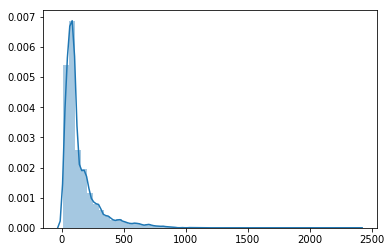

In [20]:
sns.distplot([len(news) for news in x_train ])

In [21]:

maxlen = 250  #number of word used from each review

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test =  pad_sequences(x_test, maxlen=maxlen)

In [22]:
x_train.shape

(8982, 250)

In [23]:
import keras
y = keras.utils.to_categorical(y_train)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
model = Sequential()
model.add(Embedding(30971, 8, input_length=maxlen)) #10000 for vocab size, 8 for dimensionality of embedding
model.add(Flatten())
model.add(Dense(46, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 250, 8)            247768    
_________________________________________________________________
flatten_2 (Flatten)          (None, 2000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                92046     
Total params: 339,814
Trainable params: 339,814
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(x_train, y,
epochs=20,
batch_size=32,
validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 2s 277us/step - loss: 2.3681 - acc: 0.3620 - val_loss: 1.9923 - val_acc: 0.4619
Epoch 2/20
7185/7185 [==============================] - 2s 230us/step - loss: 1.8153 - acc: 0.4870 - val_loss: 1.7373 - val_acc: 0.5170
Epoch 3/20
7185/7185 [==============================] - 2s 246us/step - loss: 1.5665 - acc: 0.5776 - val_loss: 1.6083 - val_acc: 0.5893
Epoch 4/20
7185/7185 [==============================] - 2s 236us/step - loss: 1.3557 - acc: 0.6590 - val_loss: 1.5146 - val_acc: 0.6272
Epoch 5/20
7185/7185 [==============================] - 2s 231us/step - loss: 1.1468 - acc: 0.7184 - val_loss: 1.4683 - val_acc: 0.6516
Epoch 6/20
7185/7185 [==============================] - 2s 227us/step - loss: 0.9456 - acc: 0.7770 - val_loss: 1.4039 - val_acc: 0.6683
Epoch 7/20
7185/7185 [==============================] - 2s 230us/step - loss: 0.7618 - acc: 0.8356 - val_loss: 1.3828 - val_acc: 0.6795


In [26]:
from keras.models import load_model
model.save('my_model2.h5')  
# returns a compiled model
# identical to the previous one
model = load_model('my_model2.h5')
